# Project Documentation: PowerPulse

## 1️⃣ Introduction
PowerPulse is a machine learning project designed to forecast **household energy consumption** based on historical electricity usage data. It leverages multiple regression models to analyze and predict power consumption trends.

## 2️⃣ Dataset Overview
- **Source**: UCI Machine Learning Repository
- **Main Target Variable**: Global Active Power
- **Features Used**:
  - Datetime (converted to hour, weekday, month)
  - Global Intensity
  - Sub-metering 1, 2, and 3
  - Rolling Averages (7-day and 14-day moving averages)
  
## 3️⃣ Model Development
- **Algorithms Used**:
  - Linear Regression
  - Random Forest
  - Gradient Boosting
- **Feature Engineering**:
  - Extracted time-based features (hour, weekday, month)
  - Applied rolling averages to capture trends
  - Scaled numerical data using StandardScaler

### **Performance Metrics**
| Model              | RMSE  | MAE   | R² Score |
|-------------------|-------|------|----------|
| Linear Regression | 0.1237 | 0.0942 | 0.9848 |
| Random Forest     | 0.0425 | 0.0287 | 0.9982 |
| Gradient Boosting | 0.0440 | 0.0306 | 0.9981 |

Random Forest was selected as the final model due to superior performance.


In [1]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

path = "household_power_consumption.csv"
df = pd.read_csv(path, sep = ';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
print("Rows:", df.shape[0], "Columns:", df.shape[1])

Rows: 1048575 Columns: 9


In [5]:
print("Checking the data types", df.dtypes)

Checking the data types Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [6]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(columns=["Date", "Time"], inplace=True)

In [7]:
numeric_columns = ["Global_active_power","Global_reactive_power","Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Global_active_power    1044506 non-null  float64       
 1   Global_reactive_power  1044506 non-null  float64       
 2   Voltage                1044506 non-null  float64       
 3   Global_intensity       1044506 non-null  float64       
 4   Sub_metering_1         1044506 non-null  float64       
 5   Sub_metering_2         1044506 non-null  float64       
 6   Sub_metering_3         1044506 non-null  float64       
 7   Datetime               1048575 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(7)
memory usage: 64.0 MB


In [8]:
print("Number of Null Values in each field:\n", df.isnull().sum())

Number of Null Values in each field:
 Global_active_power      4069
Global_reactive_power    4069
Voltage                  4069
Global_intensity         4069
Sub_metering_1           4069
Sub_metering_2           4069
Sub_metering_3           4069
Datetime                    0
dtype: int64


In [9]:
for col in numeric_columns:
    df[col] = df[col].interpolate(method='linear')

In [10]:
print("Number of Null Values in each field:\n", df.isnull().sum())

Number of Null Values in each field:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64


In [11]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [12]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575
mean,1.105674e+00,1.184091e-01,2.399434e+02,4.707590e+00,1.172991e+00,1.469804e+00,5.913694e+00,2007-12-15 19:31:00.000001792
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00
25%,2.880000e-01,0.000000e+00,2.379400e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-06-16 18:27:30
50%,5.420000e-01,9.800000e-02,2.402000e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-15 19:31:00
75%,1.542000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2008-06-14 20:34:30
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,2008-12-13 21:38:00
std,1.128353e+00,1.093973e-01,3.289746e+00,4.758497e+00,6.309624e+00,6.341238e+00,8.203716e+00,NaN


In [13]:
# Compute correlation matrix
correlation_matrix = df.corr()
print("Correlation Between Global_Active_Power and Global_Reactive_Power:",correlation_matrix["Global_active_power"]["Global_reactive_power"])
print("Correlation Between Global_Active_Power and Voltage:",correlation_matrix["Global_active_power"]["Voltage"])
print("Correlation Between Global_Active_Power and Global_intensity:",correlation_matrix["Global_active_power"]["Global_intensity"])
print("Correlation Between Global_Active_Power and Sub_metering_1:",correlation_matrix["Global_active_power"]["Sub_metering_1"])
print("Correlation Between Global_Active_Power and Sub_metering_2:",correlation_matrix["Global_active_power"]["Sub_metering_2"])
print("Correlation Between Global_Active_Power and Sub_metering_3:",correlation_matrix["Global_active_power"]["Sub_metering_3"])

Correlation Between Global_Active_Power and Global_Reactive_Power: 0.2541520500110391
Correlation Between Global_Active_Power and Voltage: -0.39600293389565494
Correlation Between Global_Active_Power and Global_intensity: 0.9990204593092532
Correlation Between Global_Active_Power and Sub_metering_1: 0.47414234973879604
Correlation Between Global_Active_Power and Sub_metering_2: 0.456812545787804
Correlation Between Global_Active_Power and Sub_metering_3: 0.6247298537165925


In [14]:
# Extract time-based features
df['Year'] = df['Datetime'].dt.year
df['Month'] = df['Datetime'].dt.month
df['Day'] = df['Datetime'].dt.day
df['Hour'] = df['Datetime'].dt.hour
df['Weekday'] = df['Datetime'].dt.weekday

In [15]:
# Create rolling averages
df['Global_active_power_rolling'] = df['Global_active_power'].rolling(window=10, min_periods=1).mean()

In [16]:
# Create Weekend Indicator
df['Is_Weekend'] = df['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Create Peak Hours Indicator (Assuming 6 AM - 9 AM & 6 PM - 10 PM as peak hours)
df['Is_Peak_Hour'] = df['Hour'].apply(lambda x: 1 if (6 <= x <= 9 or 18 <= x <= 22) else 0)


In [17]:
# Rolling Mean for Last 30 Minutes (Using 2-Minute Intervals in Dataset)
df['Global_active_power_rolling_30min'] = df['Global_active_power'].rolling(window=15, min_periods=1).mean()

# Exponential Weighted Moving Average (EWMA) for Smoother Trends
df['Global_active_power_ewma'] = df['Global_active_power'].ewm(span=30, adjust=False).mean()


In [18]:
# Interaction between Power Consumption and Intensity
df['Power_Intensity_Interaction'] = df['Global_active_power'] * df['Global_intensity']

# Interaction between Peak Hours and Power Consumption
df['Peak_Power_Usage'] = df['Global_active_power'] * df['Is_Peak_Hour']


In [19]:
df.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Year,Month,Day,Hour,Weekday,Global_active_power_rolling,Is_Weekend,Is_Peak_Hour,Global_active_power_rolling_30min,Global_active_power_ewma,Power_Intensity_Interaction,Peak_Power_Usage
1048570,0.426,0.076,242.27,1.8,0.0,0.0,0.0,2008-12-13 21:34:00,2008,12,13,21,5,0.3982,1,1,0.373067,0.406767,0.7668,0.426
1048571,0.424,0.076,242.10,1.8,0.0,0.0,0.0,2008-12-13 21:35:00,2008,12,13,21,5,0.4084,1,1,0.379733,0.407879,0.7632,0.424
1048572,0.422,0.076,241.73,1.8,0.0,0.0,0.0,2008-12-13 21:36:00,2008,12,13,21,5,0.4182,1,1,0.386400,0.408790,0.7596,0.422
1048573,0.422,0.078,242.56,1.8,0.0,0.0,0.0,2008-12-13 21:37:00,2008,12,13,21,5,0.4216,1,1,0.393067,0.409642,0.7596,0.422
1048574,0.422,0.078,242.61,1.8,0.0,0.0,0.0,2008-12-13 21:38:00,2008,12,13,21,5,0.4214,1,1,0.399600,0.410440,0.7596,0.422


In [20]:
df.drop(columns=["Global_reactive_power","Voltage"], inplace=True)

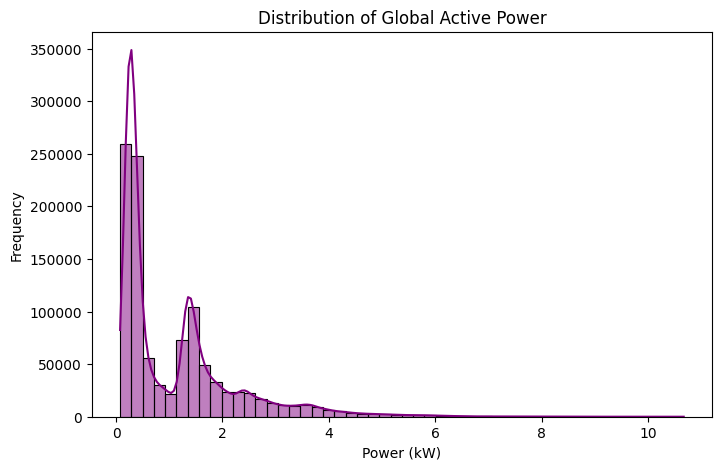

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Global_active_power'], bins=50, kde=True, color='purple')
plt.title("Distribution of Global Active Power")
plt.xlabel("Power (kW)")
plt.ylabel("Frequency")
plt.show()

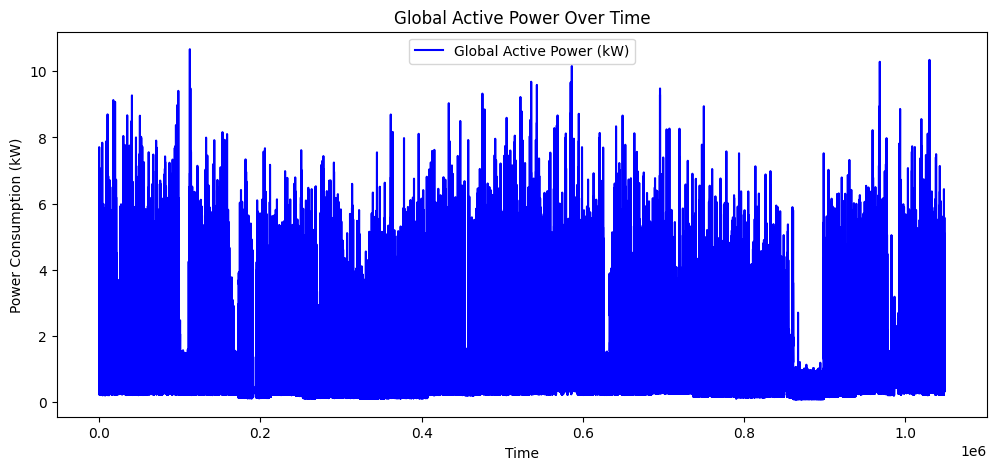

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Global_active_power'], label='Global Active Power (kW)', color='blue')
plt.xlabel("Time")
plt.ylabel("Power Consumption (kW)")
plt.title("Global Active Power Over Time")
plt.legend()
plt.show()


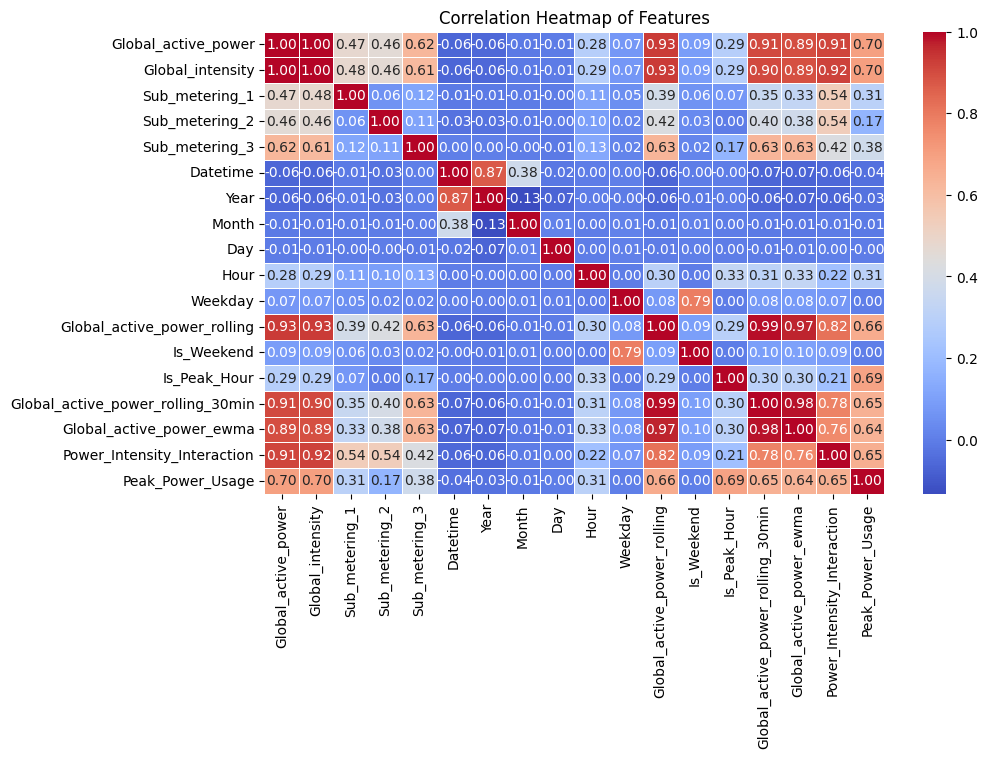

In [23]:
# Compute correlation matrix
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


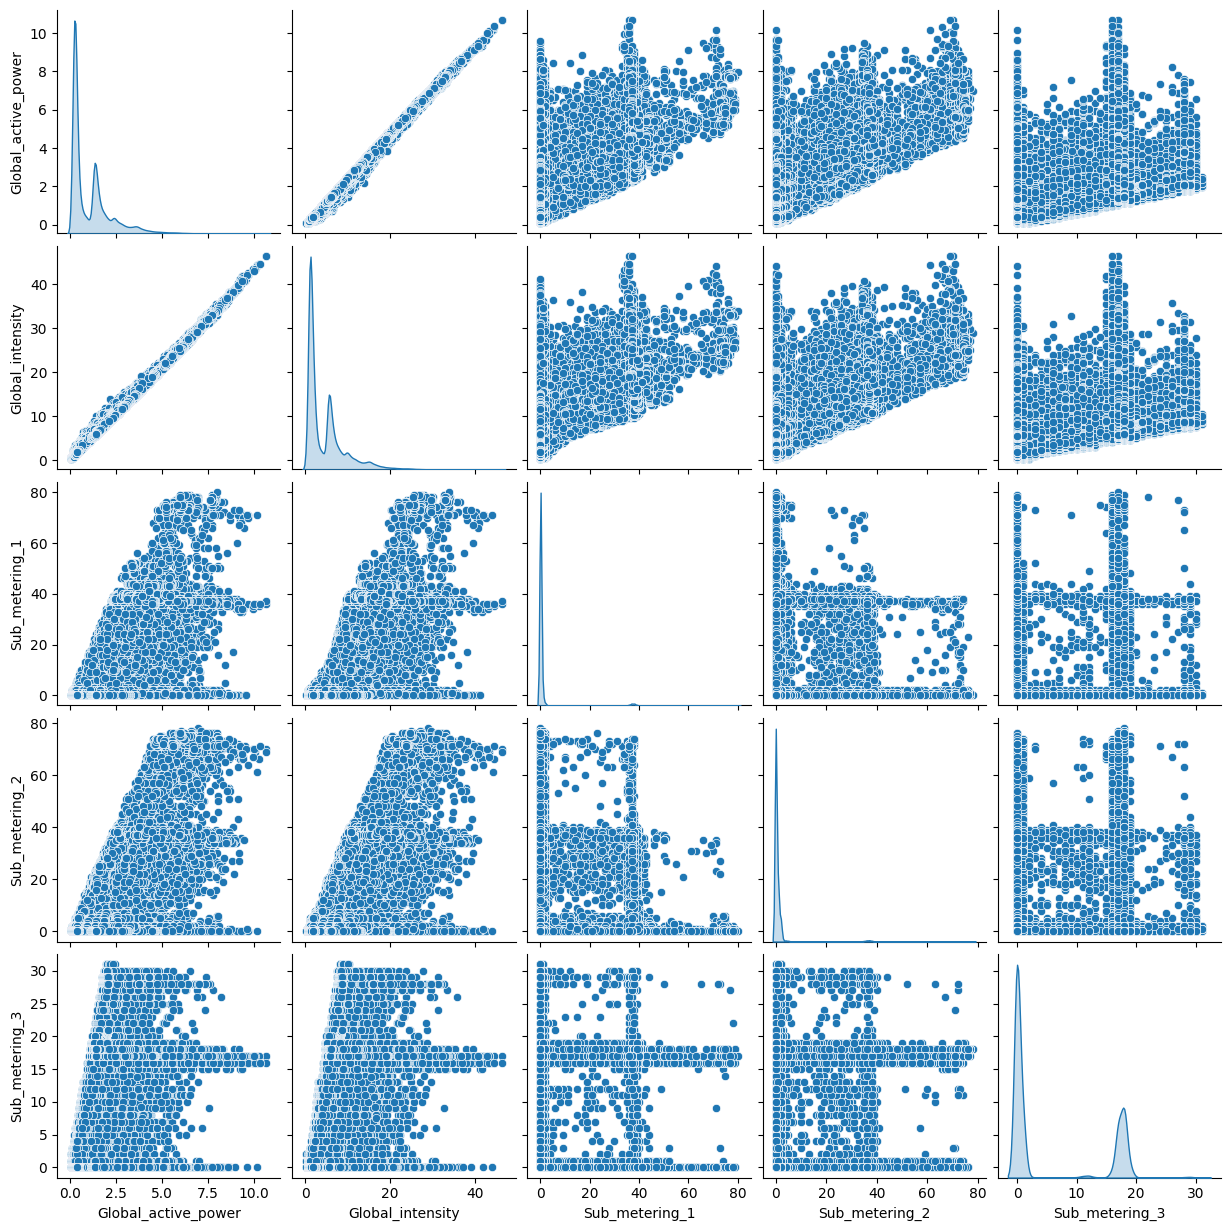

In [24]:
sns.pairplot(df[['Global_active_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']], diag_kind='kde')
plt.show()

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log transformation to skewed features (only if values > 0)
df['Global_active_power'] = np.log1p(df['Global_active_power'])  
df['Global_intensity'] = np.log1p(df['Global_intensity'])

# Normalize all features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Global_active_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']])
df_scaled = pd.DataFrame(scaled_features, columns=['Global_active_power', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])


In [26]:
# Detect outliers using IQR (Interquartile Range)
Q1 = df['Global_active_power'].quantile(0.25)
Q3 = df['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

# Remove extreme outliers
df = df[(df['Global_active_power'] >= (Q1 - 1.5 * IQR)) &  (df['Global_active_power'] <= (Q3 + 1.5 * IQR))]


In [27]:
# Convert to categorical bins
df['Sub_metering_1_bin'] = pd.cut(df['Sub_metering_1'], bins=[0, 5, 10, 20, 100], labels=[1, 2, 3, 4])
df['Sub_metering_2_bin'] = pd.cut(df['Sub_metering_2'], bins=[0, 5, 10, 20, 100], labels=[1, 2, 3, 4])
df['Sub_metering_3_bin'] = pd.cut(df['Sub_metering_3'], bins=[0, 5, 10, 20, 100], labels=[1, 2, 3, 4])


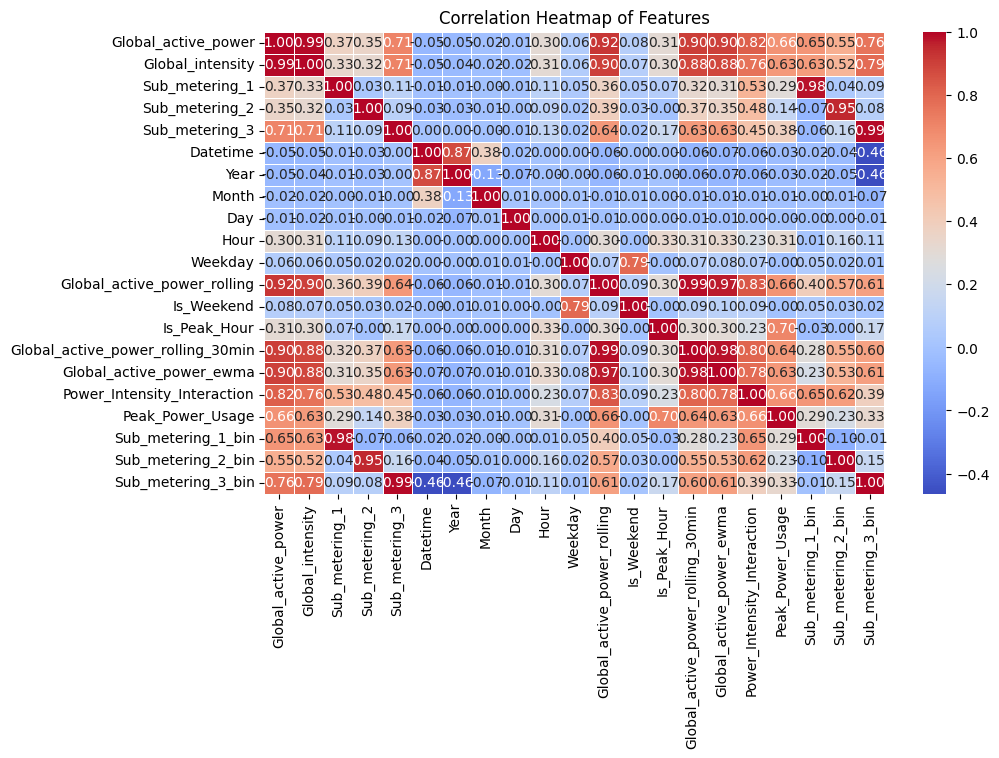

In [28]:
# Re Running correlation matrix
plt.figure(figsize=(10,6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [121]:
from sklearn.model_selection import train_test_split

feature_columns = ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'Is_Weekend', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

X = df[feature_columns]  # Extract only relevant features
y = df['Global_active_power']  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Select features & target variable
# X = df_scaled.drop(columns=['Global_active_power'])  # Features
# y = df_scaled['Global_active_power']  # Target

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
from sklearn.linear_model import LinearRegression

# Initialize & Train
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


In [123]:
from sklearn.ensemble import RandomForestRegressor

# Initialize & Train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)


In [124]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize & Train
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)


In [125]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Function to calculate and print metrics
def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"📊 {model_name} Performance:")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAE: {mae:.4f}")
    print(f"🔹 R² Score: {r2:.4f}\n")

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)


📊 Linear Regression Performance:
🔹 RMSE: 0.0549
🔹 MAE: 0.0419
🔹 R² Score: 0.9846

📊 Random Forest Performance:
🔹 RMSE: 0.0114
🔹 MAE: 0.0062
🔹 R² Score: 0.9993

📊 Gradient Boosting Performance:
🔹 RMSE: 0.0180
🔹 MAE: 0.0121
🔹 R² Score: 0.9983



In [126]:
print("Features used during training:", list(X_train.columns))

Features used during training: ['Year', 'Month', 'Day', 'Hour', 'Weekday', 'Is_Weekend', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']


In [127]:
# Example of a new custom input
# custom_input = pd.DataFrame({
#     'Year': [2025],
#     'Month': [3],
#     'Day': [21],
#     'Hour': [20],
#     'Weekday': [5],
#     'Is_Weekend': [0], 
#     'Global_intensity': [2.0],  
#     'Sub_metering_1': [0.0],
#     'Sub_metering_2': [0.0],
#     'Sub_metering_3': [0.0]
# })
custom_input = pd.DataFrame({
    'Year': [2025],
    'Month': [7],    # July (summer)
    'Day': [14],     # 14th day
    'Hour': [22],    # 10 PM (night)
    'Weekday': [6],  # Sunday
    'Is_Weekend': [1],  
    'Global_intensity': [15.0],  
    'Sub_metering_1': [3.0],
    'Sub_metering_2': [2.5],
    'Sub_metering_3': [5.0]
})


# Apply the same scaler used during training
custom_input_scaled = scaler.transform(custom_input)

# Predict using the trained model
prediction = rf_model.predict(custom_input_scaled)

print("Predicted Global Active Power:", prediction)


Predicted Global Active Power: [1.94196959]


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [112]:
# Creating sample data
sample_data = pd.DataFrame({
    'Global_intensity': [10.5, 15.2, 8.7],  
    'Sub_metering_1': [1.0, 2.5, 0.5],
    'Sub_metering_2': [1.5, 3.0, 0.8],
    'Sub_metering_3': [2.0, 1.8, 3.2],
})

# Save as CSV
sample_data.to_csv("sample_input.csv", index=False)

print("Sample CSV file 'sample_input.csv' created successfully!")


Sample CSV file 'sample_input.csv' created successfully!


In [132]:
# Example of a new custom input
custom_input = pd.DataFrame({
    'Year': [2025],
    'Month': [3],
    'Day': [21],
    'Hour': [15],
    'Weekday': [4],  # Friday
    'Is_Weekend': [0], 
    'Global_intensity': [10.5],  
    'Sub_metering_1': [1.0],
    'Sub_metering_2': [1.5],
    'Sub_metering_3': [2.0]
})


# Predict using the trained model
prediction = rf_model.predict(custom_input_scaled)

print("Predicted Global Active Power:", prediction)


Predicted Global Active Power: [1.94196959]


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
